# Quality of food offered in the World

In this notebook we explore the [Open Food Facts database](https://world.openfoodfacts.org/). After loading, observing and cleaning the data in part 1, we start our analysis in part 2. In this second part, we uncover insights about the nutritional quality of food consumed around the world. Food habits vary among countries, we would like to point out which areas offer the least healthy options by observing the products offered there.

More particularly, we will look at the following points:
# TODO update avec vrais questions auxquelles on decide de repondre
* How restrictions concerning additives in different countries affects the presence of these substances in foods around the world. We'll also look at whether banning an ingredient in a certain country reduces its presence in other places?
* We will consider the amounts of sugar and fat availble in foods around the world.
* We will look at how widespread ingredients like palm oil are.

# 1. Loading, Observing and Cleaning the Data.

## Loading the data and imports.

First, we import the necessary packages for our analysis. 

In [1]:
import pandas as pd
import numpy as np

from ast import literal_eval

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# make figures larger for better viewing
plt.rc('figure', figsize=[18,10])
plt.style.use('ggplot')

Then, we load the data and take a first look at it.

In [3]:
data_path = './data/'
open_food_facts_path = data_path + 'en.openfoodfacts.org.products.csv'

df = pd.read_csv(open_food_facts_path, sep='\t', low_memory = False, encoding='utf-8')
print(df.shape)
df.head()

(692133, 173)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1529059204,2018-06-15T10:40:04Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000291,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1534239669,2018-08-14T09:41:09Z,1534239732,2018-08-14T09:42:12Z,Mendiants,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000949,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1523440813,2018-04-11T10:00:13Z,1523440823,2018-04-11T10:00:23Z,Salade de carottes râpées,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We have 692133 entries with 173 columns in the dataset.

## Removing empty columns.

Taking a brief look at the data, we notice that a lot of values are missing. Indeed, the data from open food facts is filled by regular users inputing information from the packaging of their food products. This leads to a lot of missing values as people do not generally fill all 173 columns available in the final database.

Then what columns should we drop? We'll first look at what percentage of values are `nan` for each column.

In [4]:
number_of_rows = df.shape[0]
amount_of_nan = df.isna().sum().apply(lambda x: x / number_of_rows * 100).sort_values(ascending = False)
amount_of_nan.head()

nutrition_grade_uk                       100.000000
cities                                   100.000000
ingredients_that_may_be_from_palm_oil    100.000000
ingredients_from_palm_oil                100.000000
-nervonic-acid_100g                       99.999856
dtype: float64

We will drop columns whose nan percentage is too high. We find all columns that have more than 99% of nan values. 

In [5]:
threshold = 99
cols_with_more_than_threshold = [col for col, percentage in amount_of_nan.iteritems() if percentage > threshold]
print(cols_with_more_than_threshold)

['nutrition_grade_uk', 'cities', 'ingredients_that_may_be_from_palm_oil', 'ingredients_from_palm_oil', '-nervonic-acid_100g', 'phylloquinone_100g', '-erucic-acid_100g', 'water-hardness_100g', '-mead-acid_100g', '-butyric-acid_100g', '-caproic-acid_100g', '-elaidic-acid_100g', '-lignoceric-acid_100g', '-melissic-acid_100g', '-palmitic-acid_100g', '-caprylic-acid_100g', '-stearic-acid_100g', '-myristic-acid_100g', '-cerotic-acid_100g', 'chlorophyl_100g', 'glycemic-index_100g', '-montanic-acid_100g', '-capric-acid_100g', '-lauric-acid_100g', '-maltose_100g', 'nucleotides_100g', 'carnitine_100g', '-arachidonic-acid_100g', '-maltodextrins_100g', 'beta-glucan_100g', '-oleic-acid_100g', '-gondoic-acid_100g', 'allergens_en', 'serum-proteins_100g', 'choline_100g', 'omega-9-fat_100g', 'no_nutriments', 'inositol_100g', '-dihomo-gamma-linolenic-acid_100g', '-behenic-acid_100g', 'casein_100g', '-arachidic-acid_100g', '-gamma-linolenic-acid_100g', 'molybdenum_100g', 'chromium_100g', 'beta-carotene_1

Text(0.5,0,'colum names')

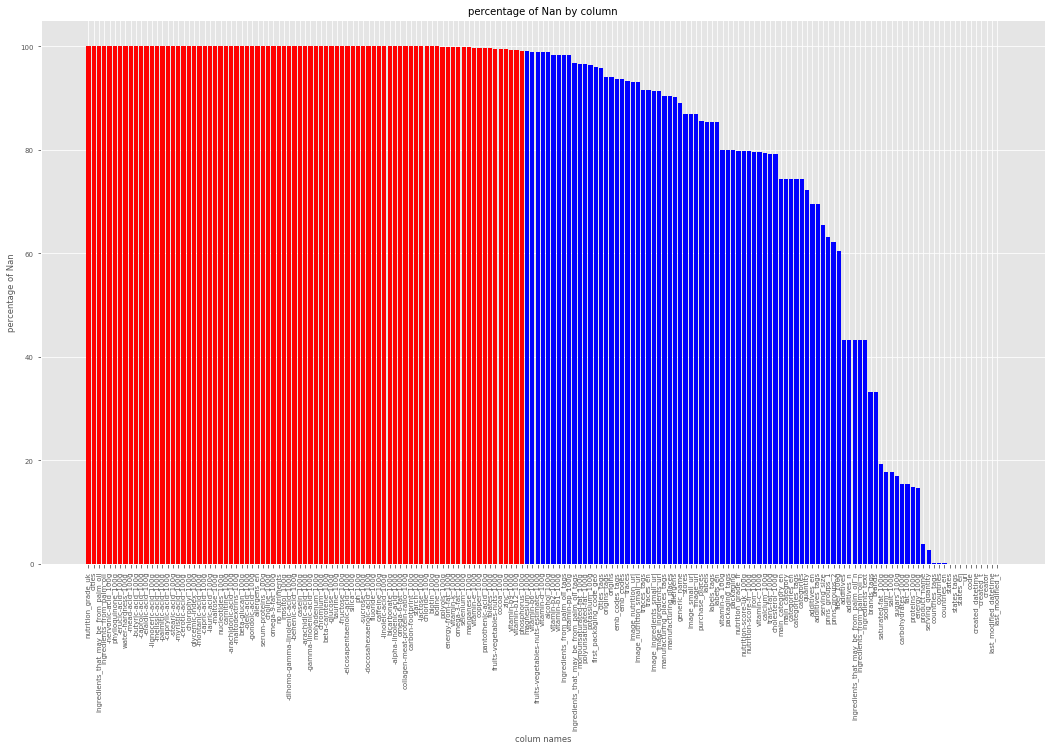

In [6]:
colors = amount_of_nan.apply(lambda percentage: 'b' if percentage < threshold else 'r')
plt.rcParams.update({'font.size': 7})
plt.xticks(rotation='vertical')
plt.bar(amount_of_nan.index, amount_of_nan, color=colors)
plt.title('percentage of Nan by column')
plt.ylabel('percentage of Nan')
plt.xlabel('colum names')

All these columns will be dropped.

In [7]:
df = df.drop(cols_with_more_than_threshold, axis=1)
df.shape

(692133, 90)

## Dropping uninteresting columns

Open Food Facts offers a large array of columns per product. Some are not interesting considering the subject of our analysis. As such, we will drop the following columns:
* `emb_codes` and `emb_codes_tags` refer to packaging numbers in France.
* `pnns_groups_1` and `pnns_groups_2` only include data in French related to the 'PNNS' dietary guidelines.
* `states`, `states_tags`and `states_en` refer to the state of the entry in the database (tags that still need to be completed).
* `image_url`, `image_small_url`, `image_ingredients_url`, `image_ingredients_small_url`, `image_nutrition_url` and `image_nutrition_small_url` give urls to pictures of the food. We will not use this.


In [8]:
uninteresting_columns_to_drop = ['emb_codes', 'emb_codes_tags', 'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_en', 'image_url',\
                   'image_small_url', 'image_ingredients_url', 'image_ingredients_small_url',\
                   'image_nutrition_url', 'image_nutrition_small_url']

df = df.drop(uninteresting_columns_to_drop, axis = 1)
df.shape

(692133, 77)

## Dealing with date types

The `created_t`, `created_datetime`, `last_modified_t` and `last_modified_datetime` columns deal with dates. We will drop `created_t` and `last_modified_t` as they contain redundant information already in the other two columns.

We will parse the dates in `created_datetime` and `last_modified_datetime` into the datetime type for esier use in our analysis.

In [9]:
df['created_datetime'] = pd.to_datetime(df['created_datetime'], errors = 'coerce', infer_datetime_format = True)
df['last_modified_datetime'] = pd.to_datetime(df['last_modified_datetime'], errors = 'coerce', infer_datetime_format = True)

df = df.drop(['created_t', 'last_modified_t'], axis=1)
df.shape

(692133, 75)

## Removing duplicate columns

Even after all this cleaning, looking at the column names, it seems that a lot of them refer to the same thing. We will check for redundancy among similar column names and drop unnecessary values.

We explore the content of the following groups of columns that seem to have redundant values:
* `categories`, `categories_tags` and `categories_en` are all related to the kind of food the product belongs to.
* `countries`, `countries_tags` and `countries_en` refer to the country of origin.
* `packaging` and `packaging_tags` give info about the type of packaging.
* `brands` and `brands_tags` contain the brand of the product.
* `origins` and `origins_tags`
* `manufacturing_places` and `manufacturing_places_tags`
* `labels`, `labels_tags` and `labels_en`
* `traces`, `traces_tags` and `traces_en`
* `serving_size` and `serving_quantity`
* `additives`, `additives_tags` and `additives_en`
* `main_category` and `main_category_en`

For each of these groups of column we will check that they indeed contain redundant information and remove all columns that are then useless.

In [10]:
# This function will print the ranking of the given columns depending on their proportion of nan values
# It also return a few values where none of the columns are nan to check for redundant data.
def analyze_columns(list_of_columns):
    print(amount_of_nan[list_of_columns].sort_values(ascending = False))
    return df[list_of_columns].dropna().reset_index(drop = 'True').head()

### Category columns

In [11]:
analyze_columns(['categories', 'categories_tags', 'categories_en'])

categories_en      74.241511
categories_tags    74.236599
categories         74.236455
dtype: float64


,categories,categories_tags,categories_en
0,Tartes à la noix de coco,"en:pies,en:sweet-pies,en:coconut-pies","Pies,Sweet pies,Coconut pies"
1,Compotes de poire,"en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo..."
2,Baguettes,"en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo..."
3,"Pavés de saumon,Saumons fumés,Pavés de saumon ...","en:seafood,en:fishes,en:salmons,en:smoked-fish...","Seafood,Fishes,Salmons,Smoked fishes,Smoked sa..."
4,Compléments alimentaires,en:dietary-supplements,Dietary supplements


Values among these 3 columns seem largely redundant. We will only keep the `categories_tags` column for its english formatting and convert it to a list of strings for easier analysis later.

In [12]:
redundant_columns_to_drop = ['categories_en', 'categories']
columns_to_convert = ['categories_tags']

### Country columns

In [13]:
analyze_columns(['countries', 'countries_tags', 'countries_en'])

countries_en      0.087266
countries_tags    0.087266
countries         0.087266
dtype: float64


,countries,countries_tags,countries_en
0,en:france,en:france,France
1,en:FR,en:france,France
2,en:france,en:france,France
3,en:france,en:france,France
4,en:france,en:france,France


These columns all cover the same amount of products. We will then only keep `countries_en` for its clearer formatting.

In [14]:
redundant_columns_to_drop += ['countries', 'countries_tags']
columns_to_convert += ['countries_en']

### Packaging columns

In [15]:
analyze_columns(['packaging', 'packaging_tags'])

packaging_tags    79.893460
packaging         79.893026
dtype: float64


,packaging,packaging_tags
0,"barquette,plastique","barquette,plastique"
1,"bocal,plastique","bocal,plastique"
2,plastique,plastique
3,"carton,plastique","carton,plastique"
4,"plastique,carton","plastique,carton"


We keep `packaging` and convert it.

In [16]:
redundant_columns_to_drop += ['packaging_tags']
columns_to_convert += ['packaging']

### Brand columns

In [17]:
analyze_columns(['brands', 'brands_tags'])

brands_tags    33.107799
brands         33.102886
dtype: float64


,brands,brands_tags
0,CROUS,crous
1,"Crous Resto',Crous","crous-resto,crous"
2,Ferme De La Frémondière,ferme-de-la-fremondiere
3,Crous,crous
4,Crous resto,crous-resto


We keep `brands_tags` as it is cleaner than `brands` for a similar number of `nan` values.

In [18]:
redundant_columns_to_drop += ['brands']

### Origin columns

In [19]:
analyze_columns(['origins', 'origins_tags'])

origins_tags    93.971823
origins         93.964021
dtype: float64


,origins,origins_tags
0,France,france
1,Québec,quebec
2,Québec,quebec
3,France,france
4,Québec,quebec


We keep `origins`.

In [20]:
redundant_columns_to_drop += ['origins_tags']

### Manufacturing columns

In [21]:
analyze_columns(['manufacturing_places', 'manufacturing_places_tags'])

manufacturing_places_tags    90.382918
manufacturing_places         90.380028
dtype: float64


,manufacturing_places,manufacturing_places_tags
0,France,france
1,France,france
2,Brossard Québec,brossard-quebec
3,Brossard Québec,brossard-quebec
4,United Kingdom,united-kingdom


We keep only `manufacturing_places`.

In [22]:
redundant_columns_to_drop += ['manufacturing_places_tags']

### Label columns

In [23]:
analyze_columns(['labels', 'labels_tags', 'labels_en'])

labels         85.308893
labels_en      85.304414
labels_tags    85.304414
dtype: float64


,labels,labels_tags,labels_en
0,Fabriqué en France,en:made-in-france,Made in France
1,"Viande Française,Fabriqué en France","fr:viande-francaise,en:made-in-france","fr:Viande Française,Made in France"
2,Contient des OGM,en:contains-gmos,Contains GMOs
3,AB,"en:organic,en:eu-organic,fr:ab-agriculture-bio...","Organic,EU Organic,fr:AB Agriculture Biologique"
4,"Kascher,Contient des OGM","en:kosher,en:contains-gmos","Kosher,Contains GMOs"


`labels_tags` and `labels_en` cover the same rows, we will keep `labels_en` for its formatting and convert it. `labels` is unfortunately in French.

In [24]:
redundant_columns_to_drop += ['labels', 'labels_tags']
columns_to_convert += ['labels_en']

### Traces columns

In [25]:
analyze_columns(['traces', 'traces_tags', 'traces_en'])

traces         93.236271
traces_en      91.468258
traces_tags    91.468258
dtype: float64


,traces,traces_tags,traces_en
0,"milk, egg,","en:eggs,en:milk","Eggs,Milk"
1,"nuts, milk, soya, wheatflour, gluten, oatmeal,...","en:eggs,en:gluten,en:milk,en:nuts,en:soybeans,...","Eggs,Gluten,Milk,Nuts,Soybeans,Oatmeal,Wheatflour"
2,CONTIENT : OEUF. LAIT. ANCHOIS. SOYA. BLE. SEI...,fr:contient-oeuf-lait-anchois-soya-ble-seigle-...,fr:contient-oeuf-lait-anchois-soya-ble-seigle-...
3,"Soja,Anhydride sulfureux et sulfites,Contient ...","en:soybeans,en:sulphur-dioxide-and-sulphites,f...","Soybeans,Sulphur dioxide and sulphites,fr:cont..."
4,"Blé,Orge,Peut contenir: Noix variés Soya Lait...","en:gluten,fr:peut-contenir-noix-varies-soya-la...","Gluten,fr:peut-contenir-noix-varies-soya-lait-..."


`traces_tags` is better formatted and contains less `nan` values.

In [26]:
redundant_columns_to_drop += ['traces', 'traces_en']
columns_to_convert += ['traces_tags']

### Serving size columns

In [27]:
analyze_columns(['serving_size', 'serving_quantity'])

serving_size        65.393790
serving_quantity     2.652091
dtype: float64


,serving_size,serving_quantity
0,28 g (1 ONZ),28
1,28 g (0.25 cup),28
2,28 g (0.25 cup),28
3,35 g (0.25 cup),35
4,52 g (0.5 cup),52


Here, clearly `serving_quantity` is the right choice as it has less `nan` values and is formatted more simply.

In [28]:
redundant_columns_to_drop += ['serving_size']

### Additives columns

In [29]:
analyze_columns(['additives', 'additives_tags', 'additives_en'])

additives_en      69.492569
additives_tags    69.487801
additives         43.253537
dtype: float64


,additives,additives_tags,additives_en
0,[ antioxydant -> fr:antioxydant ] [ erythor...,"en:e150,en:e160a,en:e202,en:e316,en:e466","E150 - Caramel,E160a - Alpha-carotene,E202 - P..."
1,[ lait-entier -> fr:lait-entier ] [ lait ->...,en:e406,E406 - Agar
2,[ paln-suedois-42 -> fr:paln-suedois-42 ] [...,"en:e300,en:e503","E300 - Ascorbic acid,E503 - Ammonium carbonates"
3,[ taboule-76 -> fr:taboule-76 ] [ taboule -...,en:e202,E202 - Potassium sorbate
4,[ pain-aux-6-cereqles-61 -> fr:pain-aux-6-cer...,"en:e250,en:e252","E250 - Sodium nitrite,E252 - Potassium nitrate"


Looking at the proportion of `nan` values, the `additives` column seems to be the best choice. However, its content is not what we expected. We will instead keep `additives_tags`.

In [30]:
redundant_columns_to_drop += ['additives', 'additives_en']
columns_to_convert += ['additives_tags']

### Main category columns

In [31]:
analyze_columns(['main_category', 'main_category_en'])

main_category_en    74.252203
main_category       74.252203
dtype: float64


,main_category,main_category_en
0,en:pies,Pies
1,en:plant-based-foods-and-beverages,Plant-based foods and beverages
2,en:plant-based-foods-and-beverages,Plant-based foods and beverages
3,en:seafood,Seafood
4,en:dietary-supplements,Dietary supplements


Their percentage of `nan` values are identical, we keep `main_category_en`.

In [32]:
redundant_columns_to_drop += ['main_category']

### Dropping columns and performing conversions

Finally, we remove all the columns from the dataframe and we convert several columns from strings to list of strings.

In [33]:
print(redundant_columns_to_drop)
print(columns_to_convert)

['categories_en', 'categories', 'countries', 'countries_tags', 'packaging_tags', 'brands', 'origins_tags', 'manufacturing_places_tags', 'labels', 'labels_tags', 'traces', 'traces_en', 'serving_size', 'additives', 'additives_en', 'main_category']
['categories_tags', 'countries_en', 'packaging', 'labels_en', 'traces_tags', 'additives_tags']


In [34]:
df = df.drop(redundant_columns_to_drop, axis = 1)
df.shape

(692133, 59)

In [35]:
for col in columns_to_convert:
    df[col] = df[col].astype(str).apply(lambda s: s if s == 'nan' else s.split(','))
    
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692133 entries, 0 to 692132
Data columns (total 59 columns):
code                                          692099 non-null object
url                                           692099 non-null object
creator                                       692130 non-null object
created_datetime                              692098 non-null datetime64[ns]
last_modified_datetime                        692099 non-null datetime64[ns]
product_name                                  665819 non-null object
generic_name                                  76748 non-null object
quantity                                      192720 non-null object
packaging                                     692133 non-null object
brands_tags                                   462983 non-null object
categories_tags                               692133 non-null object
origins                                       41777 non-null object
manufacturing_places                          6

### Removing illogical entries

Even after having cleaned all this we should be careful to remove any illogical entries. Indeed, some values are obvious wrong entries.

First, we consider values of the form `carbohydrates_100g` (this indicates the amount of carbohydrates per 100g). This value must necessarely be between 0 and 100. We remove all entries not in this range.

In [36]:
per_100g_columns = ['fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g',\
                    'polyunsaturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',\
                    'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',\
                    'salt_100g', 'sodium_100g']

for col in per_100g_columns:
    df = df[((0 <= df[col]) & (df[col] <= 100)) | df[col].isna()]

The `energy_100g` column indicates the amount of energy per 100g in kJ. Fat provides the most energy per gram with 37.7kJ in a gram of fat [\[source\]](http://www.nutritionaustralia.org/national/resource/balancing-energy-and-out). As such, a product containing only fat would provide 100 * 37.7 = 3770kJ of energy. We remove any entry with a value higher than this.

In [37]:
df = df[((0 <= df['energy_100g']) & (df['energy_100g'] <= 3770)) | df['energy_100g'].isna()]

Sugars are actually a subset of carbohydrates. This means that we cannot have more sugars per 100g than carbohydrates. Similarly, saturated fats are a subset of fat.

We remove entries where the subset has a higher content than its category.

In [38]:
df = df[df['sugars_100g'] <= df['carbohydrates_100g']]
df = df[df['saturated-fat_100g'] <= df['fat_100g']]

# 2. Exploring the cleaned data

## Palm oil

We want to explore the data related to palm oil ingredients as this is one of the questions we wish to consider. We first define a function to plot the percentage of palm oil ingredients for an aritrary column.

In [43]:
def percentage_of_palm_based_products(column_name, threshold):
    df_by_brands = df[[column_name,'ingredients_from_palm_oil_n']]
    df_by_brands = df_by_brands.dropna()
    df_by_brands.ingredients_from_palm_oil_n = df_by_brands.ingredients_from_palm_oil_n
    df_by_brands = df_by_brands.groupby([column_name])

    values_dict = {column_name: [], 'percentages_of_palm_based_products':[]}
    for name, group_ingredients_palm in df_by_brands:
        number_of_products = len(group_ingredients_palm)
        if number_of_products > threshold:
            n_products_containing_palm = group_ingredients_palm['ingredients_from_palm_oil_n'].astype(bool).sum()
            percentage = n_products_containing_palm / number_of_products
            if percentage > 0.02:
                values_dict['percentages_of_palm_based_products'].append(percentage)
                values_dict[column_name].append(name)
    return pd.DataFrame.from_dict(values_dict).set_index(column_name)

Let's see what brands in the dataset use palm oil the most.

Text(0.5,1,'percentage of products containing palm oil based ingredients vs product brand')

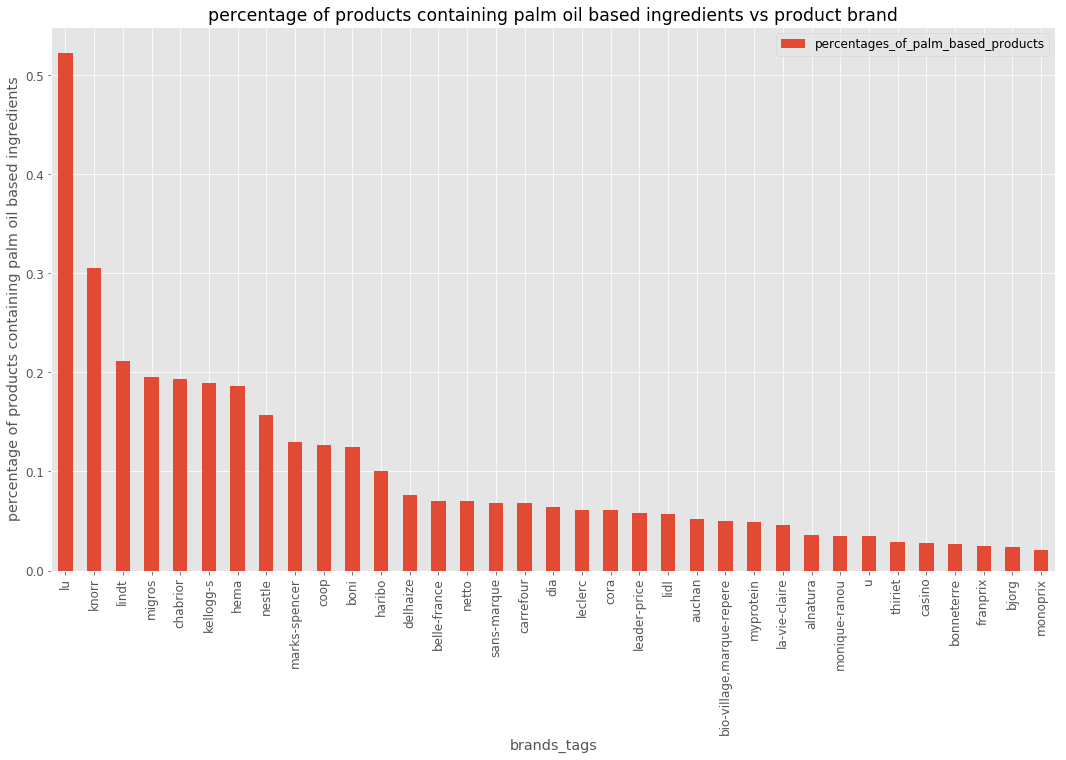

In [44]:
plt.rcParams.update({'font.size': 12})
palm_broducs_by_brand = percentage_of_palm_based_products('brands_tags', 300)
palm_broducs_by_brand.sort_values(by='percentages_of_palm_based_products', ascending=False).plot.bar()
plt.ylabel('percentage of products containing palm oil based ingredients')
plt.title('percentage of products containing palm oil based ingredients vs product brand')

The top 3 values are Lu, Knorr and Migros. This makes sense as the first brand is a mass producer of cakes and biscuits (both of which often contain inexpensive vegetable oils such as palm oil). Same for Knorr and Migros, they offer a large selection of prepared foods that make us of palm oil to cut down on costs.

Text(0.5,1,'percentage of products containing palm oil based ingredients vs product category')

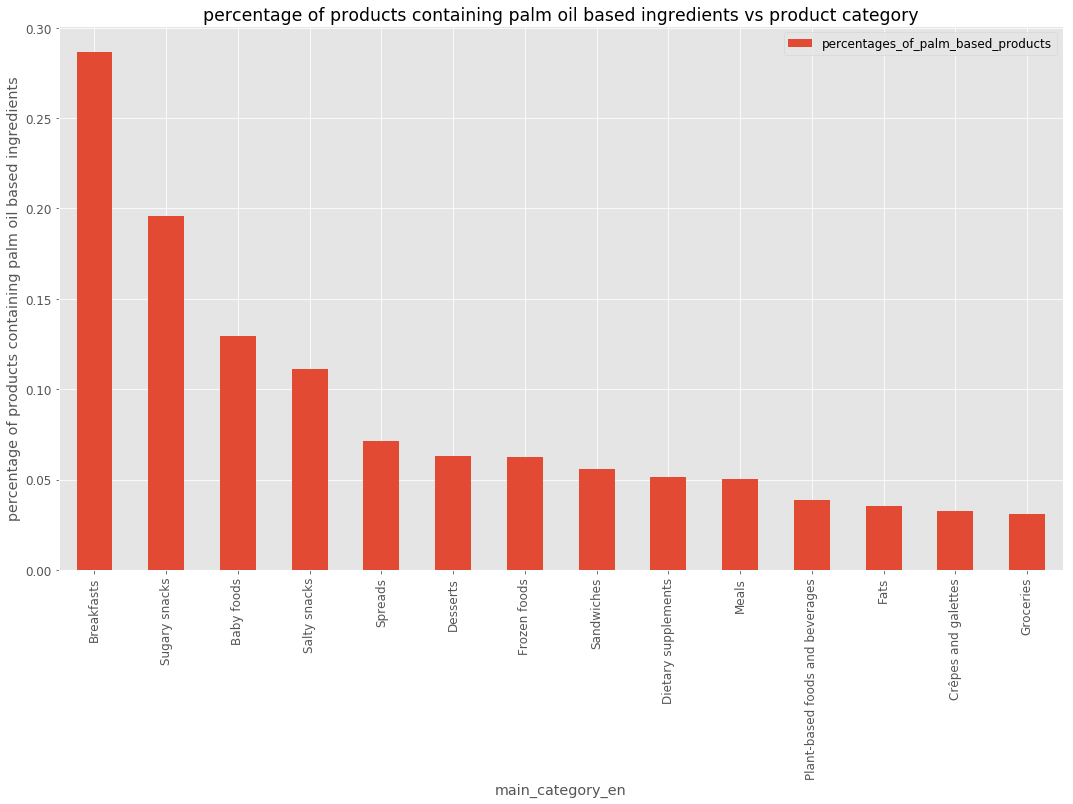

In [45]:
palm_broducs_by_brand = percentage_of_palm_based_products('main_category_en', 200)
palm_broducs_by_brand.sort_values(by='percentages_of_palm_based_products', ascending=False).plot.bar()
plt.ylabel('percentage of products containing palm oil based ingredients')
plt.title('percentage of products containing palm oil based ingredients vs product category')

Breakfast is the category with the highest palm oil percentage, this makes sense when we consider things like spreads (which unfortunately also have their own category, this is proaly a slight categorization problem). It's not surprising to see that snacks (whether sugary or salty )

## Sugar and Fat

In [56]:
def group_by_country_and_aggregate(df, metric, metric_name, aggregate_function, n_mini):
    per_country = {}

    def add_value(row):
        val = metric(row)
        if pd.isnull(val):
            return
                
        for country in row["countries_en"]:
            if not country in per_country.keys():
                per_country[country] = []
            per_country[country] += [val]

    for _, row in df.iterrows():
        add_value(row)
    
    filtred_dict = {}
    for k in per_country.keys():
        l = per_country[k]
        if len(l) >= n_mini:
            filtred_dict[k] = l
            
    countries = list(filtred_dict.keys())
    final_scores =  [aggregate_function(filtred_dict[c]) for c in countries]

    return pd.DataFrame({"country": countries, metric_name: final_scores}).set_index("country").sort_values(metric_name, ascending=False)

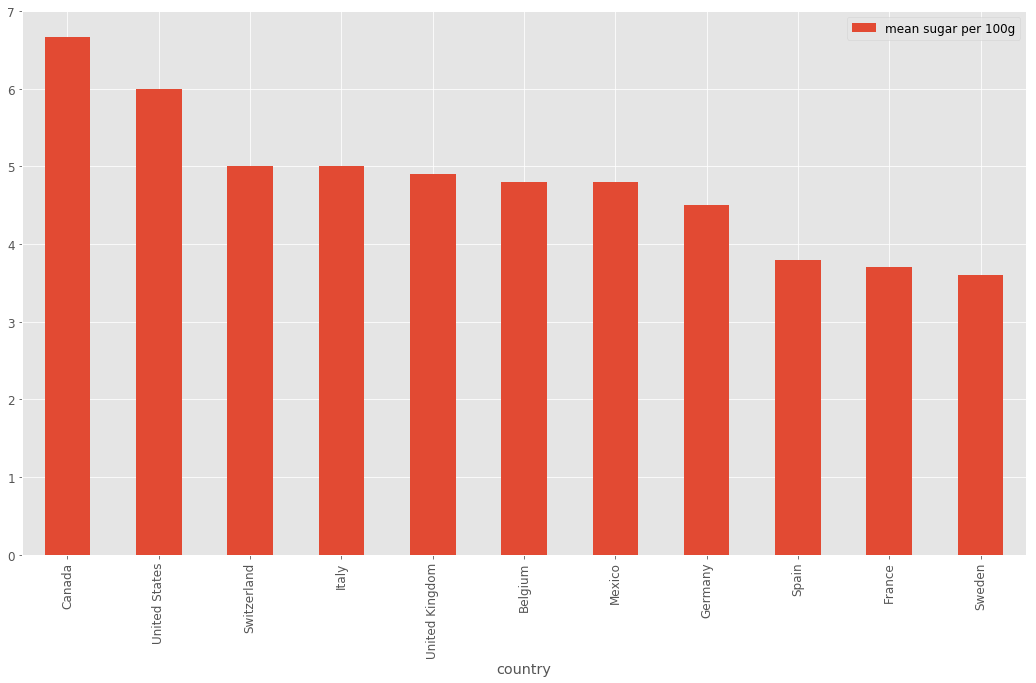

In [57]:
def sugar(row):
    return row["sugars_100g"]

mean_sugar_per_country = group_by_country_and_aggregate(df, sugar, "mean sugar per 100g", np.median, 1000)
mean_sugar_per_country.plot.bar()

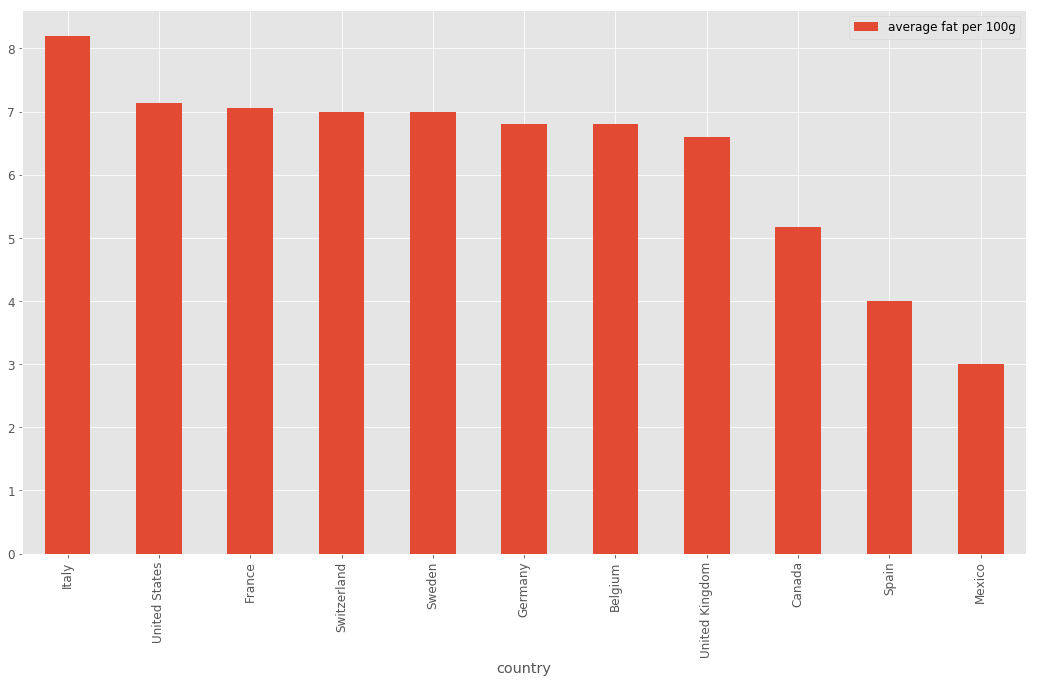

In [58]:
def fat(row):
    return row["fat_100g"]

mean_fat_per_country = group_by_country_and_aggregate(df, fat, "average fat per 100g", np.median, 1000)
mean_fat_per_country.plot.bar()